In [12]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [50]:
titlesize = 16
labelsize = 16
legendsize = 16
xticksize = 16
yticksize = xticksize

plt.rcParams['legend.markerscale'] = 1.5             
plt.rcParams['legend.handletextpad'] = 0.5           
plt.rcParams['legend.labelspacing'] = 0.4          
plt.rcParams['legend.borderpad'] = 0.5             
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = labelsize
plt.rcParams['axes.titlesize'] = titlesize
plt.rcParams['figure.figsize'] = (10, 6)

plt.rc('xtick', labelsize=xticksize)
plt.rc('ytick', labelsize=yticksize)
plt.rc('legend', fontsize=legendsize)

### 1. Генерация данных
    1.1. numpy.random   

In [28]:
# равномерное распределение от 0 до 1
size = 5
np. random. rand(size, 2)

array([[0.73015412, 0.29984601],
       [0.12654997, 0.57186927],
       [0.70125847, 0.55519093],
       [0.54919514, 0.68006003],
       [0.64133469, 0.31738715]])

In [30]:
# равномерное целочисленное распределение
np. random. randint (1, 4, size)

array([2, 1, 3, 1, 2])

In [32]:
# нормальное распределение
np. random. normal (10, 5, size)

array([ 8.47005007,  8.59781802, 17.08203396, 11.70724595, 19.57213776])

#### 1.2. scipy.stats

In [53]:
#нормальное распределение
stats.norm.rvs(10, 1, size)

array([9.35442062, 9.54646238, 8.28121642, 8.25506764, 9.95271699])

## 2. Информация о распределениях
#### 2.1. Плотность распредления 

Плотность распределения абсолютно непрерывной случайной величины обозначается как:

$$ ( f(x) = F'(x) $$

Вероятность попадания величины $X$ на отрезок от $a$ до $b$:

$$ P(a < X < b) = \int_{a}^{b} f(x) dx $$

In [83]:
stats.norm.pdf(10, loc=10, scale=3)

0.1329807601338109

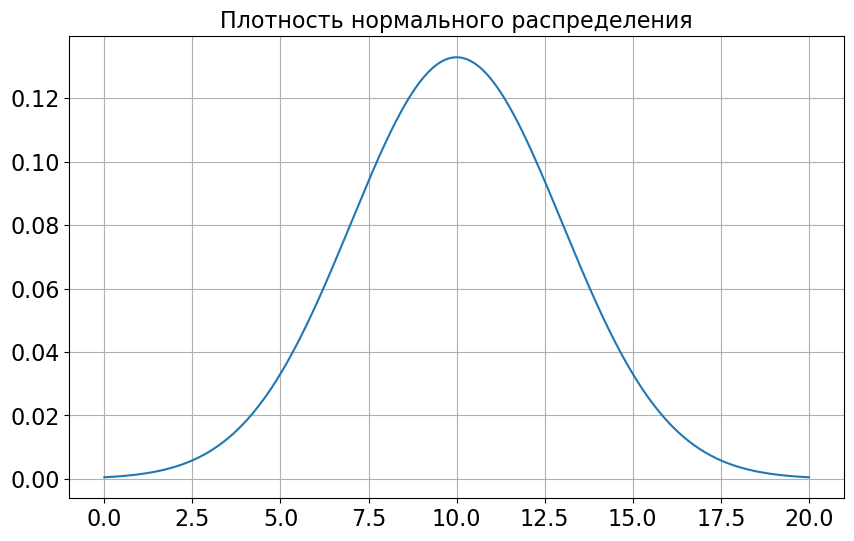

In [85]:
X = np.linspace(0, 20, 1000)
Y = [stats.norm.pdf(x, loc=10, scale=3) for x in X]
plt. plot (X, Y)
plt. title('Плотность нормального распределения')
plt.grid()
plt. show()

#### 2.2. Функция распределения 

$$Fx(x) = P(X < x)$$
Выразим вероятность попадания величины Х на отрезок от а до в через функцию распределения
$$P(a < X < b) = F(b) - F(a)$$

In [109]:
stats.norm.cdf (1.96) - stats.norm.cdf (-1.96)

0.950004209703559

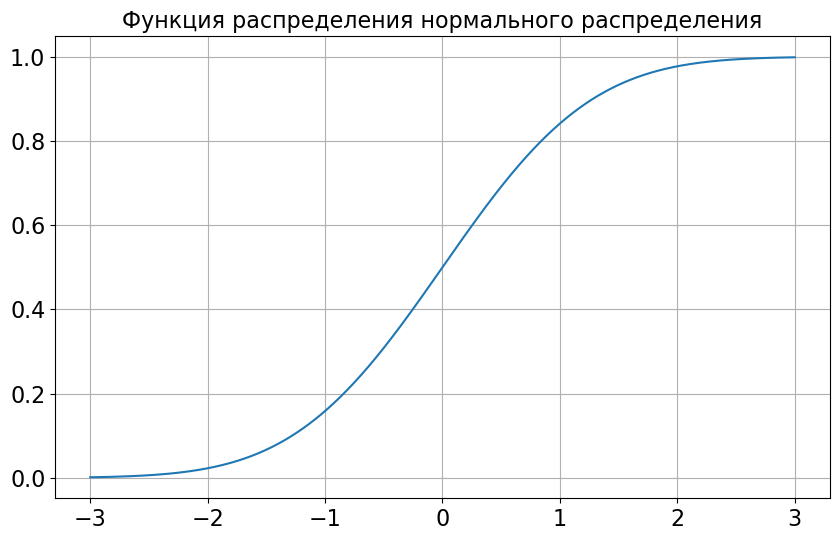

In [115]:
X = np.linspace(-3, 3, 1000)
Y = [stats.norm.cdf (x)for x in X]
plt.plot(X, Y)
plt.title('Функция распределения нормального распределения')
plt.grid()
plt.show()

#### 2.3. Обратная функция распределения

Percent point function (inverse of cdf)

In [124]:
stats.norm.ppf(0.5)

0.0

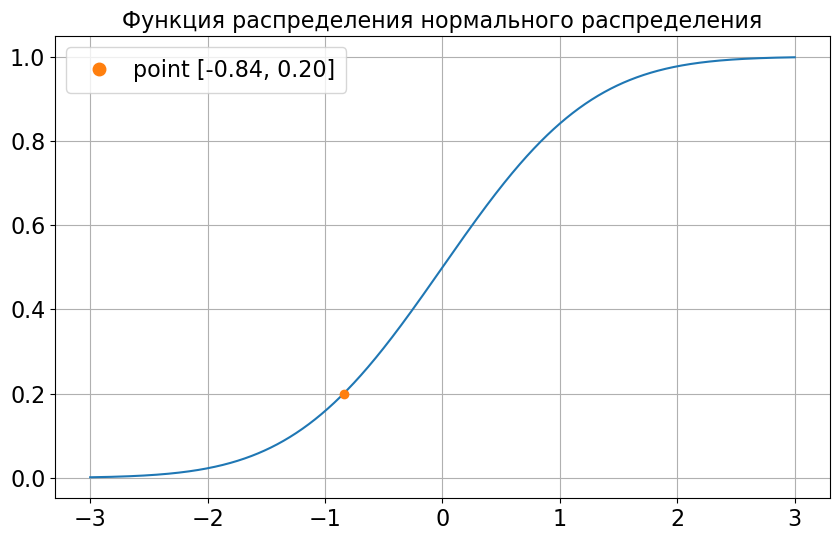

In [126]:
X = np.linspace(-3, 3, 1000)
Y = [stats.norm.cdf(x) for x in X]

cdf_y = 0.2
cdf_x = stats.norm.ppf(cdf_y)

plt.plot(X, Y)
plt.plot([cdf_x], [cdf_y], 'o', label=f'point [{cdf_x:0.2f}, {cdf_y:0.2f}]')
plt.title('Функция распределения нормального распределения')
plt.legend()
plt.grid()
plt.show()

#### 2.4. Эмпирическая функция распределения

$X_1...., Х_n \sim F$ - выборка независимых одинаково распределённых случайных величин.

Эмпирическая функция распределения  $\hat{F}_n$ имеет вид:

$$\hat{F}_n(x) = \frac{\sum\limits_1{i=1}^n I(X_i \leq x)}{n}$$
где 

$$
I(X_i \leq x) =
\left\{
    \begin{aligned} 
        1, & \quad X_i \leq x \\
        0, & \quad X_i > x
    \end{aligned}
\right.
$$

**Свойства ЭФР**

$$\text{bias} = \mathbb{E}(\hat{F}_n(x)) - F(x) = 0$$

$$\text{V}(\hat{F}_n(x)) = \frac{F(x)(1 - F(x))}{n}$$

$$\text{MSE} = \frac{F(x)(1 - F(x))}{n} + \text{bias}^2 \rightarrow \frac{F(x)(1 - F(x))}{n}, \quad \text{при } n \to \infty$$

$$\hat{F}_n(x) \xrightarrow{p} F(x)$$

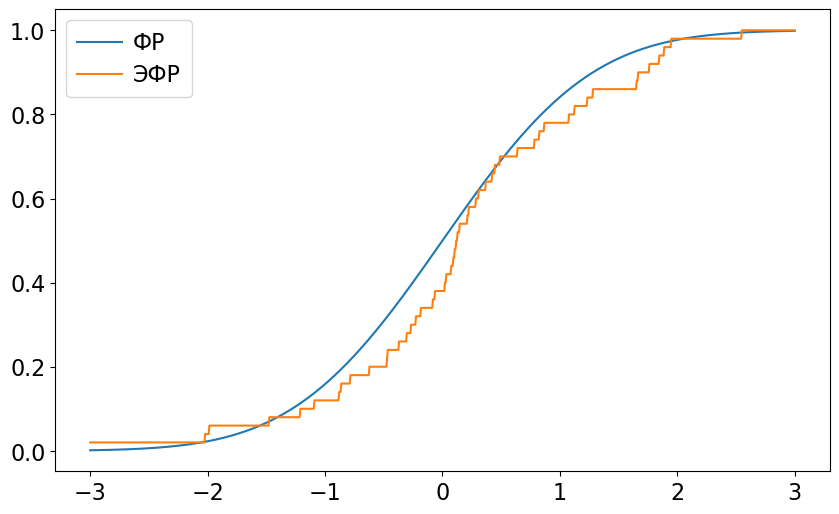

In [173]:
data = np.random.normal(size=50)
ecdf_Y = [np.mean(data < x) for x in X]

plt.plot(X, Y, label='ФР')
plt.plot(X, ecdf_Y, label='ЭФP')
plt.legend()
plt.show()

In [167]:
(data < 0).mean()

0.5

# 3. Точечные оценки

### Оценка среднего значения
Выборочное среднее

In [182]:
mean = 1
data = np.random.normal(mean, 1, 1000)
estimated_mean = np.mean(data)
print(f'mean = {mean}')
print(f'estimated_mean = {estimated_mean:0.3f}')

mean = 1
estimated_mean = 0.957


### Оценка стандартного отклонения

In [186]:
std = 1 
data = np.random.normal(1, std, 1000)
estimated_std = np.std(data)
print(f'std = {std}')
print(f'estimated_std = {estimated_std:0.3f}')

std = 1
estimated_std = 0.995


## 4. Свойства оценок

#### 4.1. Несмещённость

$\hat{\theta}$ или $\hat{\theta}_n$ — оценка параметра $theta$.

$\hat{\theta}_n = g(X_1, \dots, X_n)$ — случайная величина, т.к. зависит от данных.

Оценка $\hat{\theta}_n$ **несмещённая**, если: $\mathbb{E}(\hat{\theta}_n) = \theta$

#### Пример

Пусть $X_1, \dots, X_n \sim F$, покажем, что  $\bar{X}$ является несмещённой оценкой $\mathbb{E}(X) = m$.

$$
\mathbb{E}(\bar{m}) = \mathbb{E} \left( \frac{1}{n} \sum_{i=1}^{n} X_i \right)
= \frac{1}{n} \sum_{i=1}^{n} \mathbb{E}(X_i) 
= \frac{1}{n} \sum_{i=1}^{n} m 
= \frac{nm}{n} = m
$$

In [201]:
mean = 10
size = 100
data = np.random.normal(mean, 1, size)
estimated_mean = np.mean(data)

print(f'estimated_mean = {estimated_mean:0.3f}')

estimated_mean = 10.037


Доверительный интервал для среднего средних

In [203]:
n = 100000
means = np.random.normal(mean, 1, (n, size)).mean(axis=1)
mean_means = np.mean(means)
std_means = np.std(means) / n ** 0.5

print(mean_means - 1.96 * std_means, mean_means + 1.96 * std_means)

9.99918439642617 10.000426485371978


# 4.2. Состоятельность

Сходимость по вероятности: $\forall \epsilon > 0$ выполняется:

$\mathbb{P}(|\hat{\theta}_n - \theta| > \epsilon) \xrightarrow{n \to \infty} 0$

Оценка \( \hat{\theta}_n \) **состоятельная**, если:

$\hat{\theta}_n \xrightarrow{\mathbb{P}} \theta$

### Пример
Дана выборка независимых одинаково распределённых случайных величин \( X_1, \dots, X_n \sim F \). Покажем, что оценка математического ожидания

$\hat{\theta} = \frac{1}{n} \sum_{i=1}^{n} X_i$

является состоятельной.

Вычислим дисперсию:

$\text{Var}(\hat{\theta}) = \text{Var} \left( \frac{1}{n} \sum_{i=1}^{n} X_i \right)
= \frac{1}{n^2} \text{Var} \left( \sum_{i=1}^{n} X_i \right)
= \frac{1}{n^2} n \sigma^2 = \frac{\sigma^2}{n}$

Используем неравенство Чебышёва:

$\mathbb{P}(|\hat{\theta} - \theta| > \epsilon) \leq \frac{\text{Var}(\hat{\theta})}{\epsilon^2} = \frac{\sigma^2}{n \epsilon^2} \xrightarrow{n \to \infty} 0$

Таким образом,  $\hat{\theta}_n$ является состоятельной оценкой параметра $\theta$.

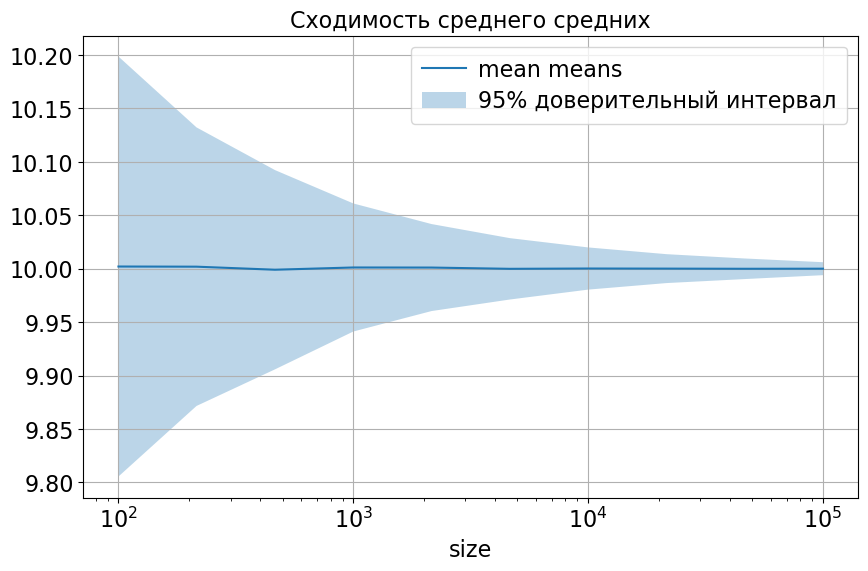

In [209]:
sizes = np.logspace(2, 5, 10).astype(int)

mean_means = []
std_means = []
for size_ in sizes:
    means_ = []
    for _ in range(1000):
        data_ = np.random.normal(mean, 1, size_) 
        means_.append(np.mean(data_)) 
    mean_means.append(np.mean(means_))
    std_means.append(np.std(means_))

lower_bounds = []
upper_bounds = []
for mean_, std_ in zip(mean_means, std_means):
    lower_bounds.append(mean_ - 1.96 * std_)
    upper_bounds.append(mean_ + 1.96 * std_)

plt.plot(sizes, mean_means, label='mean means')
plt.fill_between(sizes, lower_bounds, upper_bounds, alpha=0.3, label='95% доверительный интервал')
plt.xscale('log')
plt.title('Сходимость среднего средних')
plt.xlabel('size')
plt.legend()
plt.grid()
plt.show()

# 4.3. Три варианта оценки среднего

Оценка $\hat{m}_1$:

$\hat{m}_1 = \frac{X_1 + \dots + X_n}{n}$

Оценка $\hat{m}_2$:

$\hat{m}_2 = \min(X_1, \dots, X_n)$

Оценка $\hat{m}_3$:

$\hat{m}_3 = X_{(1)}$

#### Покажем, что $\hat{m}_1$ не несмещённая оценка

In [222]:
n = 100000
mean = 10

mins = np.random.normal(mean, 1, (n, size)).min(axis=1)
mean_mins = np.mean(mins)
std_mins = np.std(mins) / n ** 0.5

print(mean_mins - 1.96 * std_mins, mean_mins + 1.96 * std_mins)

7.487593427568421 7.492915284303222


#### Покажем, что $\hat{m}_2$ не несмещённая оценка

In [224]:
n = 100000
mean = 10

mins = np.random.normal(mean, 1, (n, size))[:, 0]
mean_mins = np.mean(mins)
std_mins = np.std(mins) / n ** 0.5

print(mean_mins - 1.96 * std_mins, mean_mins + 1.96 * std_mins)

9.996060359491786 10.008475591594163


#### Покажем, что $\hat{m}_3$ не несмещённая оценка

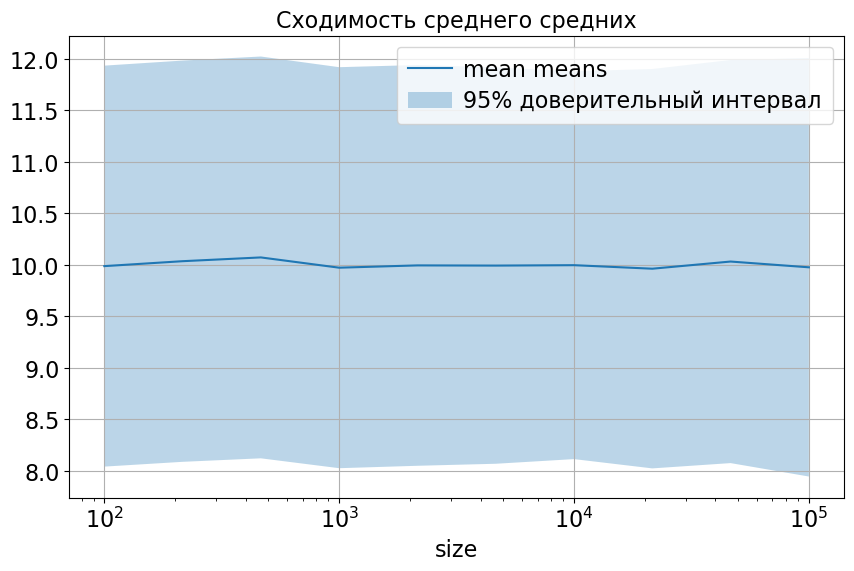

In [228]:
sizes = np.logspace(2, 5, 10).astype(int)

mean_means = []
std_means = []
for size_ in sizes:
    means_ = []
    for _ in range(1000):
        data_ = np.random.normal(mean, 1, size_) 
        means_.append(data_[0]) 
    mean_means.append(np.mean(means_))
    std_means.append(np.std(means_))

lower_bounds = []
upper_bounds = []
for mean_, std_ in zip(mean_means, std_means):
    lower_bounds.append(mean_ - 1.96 * std_)
    upper_bounds.append(mean_ + 1.96 * std_)

plt.plot(sizes, mean_means, label='mean means')
plt.fill_between(sizes, lower_bounds, upper_bounds, alpha=0.3, label='95% доверительный интервал')
plt.xscale('log')
plt.title('Сходимость среднего средних')
plt.xlabel('size')
plt.legend()
plt.grid()
plt.show()